In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from tqdm import tqdm
import tqdm.notebook as tqdmnb

# managing files
from glob import glob
from shutil import copyfile
import pickle as pkl

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

# Audio
import librosa
import librosa.display as dsp
import IPython.display as ipd

# Augmentation
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

In [24]:
pkl_path = "./data/features/classes/train_sr_16e3_bearing_crop4_featuremfccADD_label.pkl"
with open(pkl_path, 'rb') as f: raw_data = pkl.load(f)

len(raw_data)

990

In [27]:
train_data = [np.resize(i[0], (128, 128)) for i in raw_data]
train_label = [i[-1] for i in raw_data]

(128, 128)


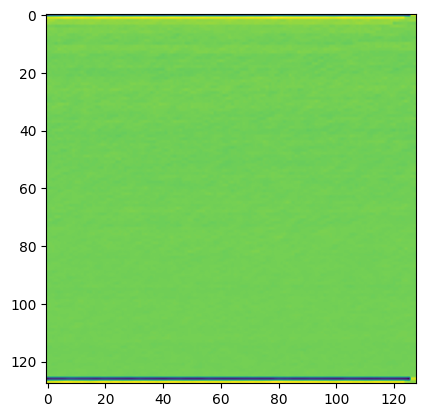

In [28]:
print(np.shape(train_data[0]))
plt.imshow(train_data[0])

In [29]:
# Define Augmentation
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])

In [31]:
print(np.max(train_label), np.min(train_label))

0 0


In [32]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_label))
train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [33]:

input_shape = (4,)
print(f'Feature shape: {input_shape}')

model_sim = Sequential([
    layers.Dense(350, input_shape=input_shape, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(2, activation='relu'),
])

Feature shape: (4,)


In [37]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(128, 128, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history = model.fit(train_ds, epochs=10)

Epoch 1/10


2024-05-24 14:40:00.630722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-05-24 14:40:01.042046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-24 14:40:01.299593: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x890fe10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-24 14:40:01.299611: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2024-05-24 14:40:01.350087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-24 14:40:01.607374: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the pro

62/62 [==============================] - 3s 5ms/step - loss: 0.0240 - accuracy: 0.9838
Epoch 2/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1

In [101]:
inf_path = glob('data/test/*.*')

inf_data = []
for i in tqdm(inf_path):
    inf_data.append(path_to_mel(i, False))

  0%|          | 0/5732 [00:00<?, ?it/s]/var/folders/8k/pkmq0wfd32q_r2nr5rcf2x1m0000gn/T/ipykernel_52724/246142194.py:12: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(audio, sr=sr, n_mels=40)
  0%|          | 9/5732 [00:02<29:31,  3.23it/s]/var/folders/8k/pkmq0wfd32q_r2nr5rcf2x1m0000gn/T/ipykernel_52724/246142194.py:12: FutureWarning: Pass y=[ 3.34500108e-08 -2.36135293e-07  4.83323220e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(audio, sr=sr, n_mels=40)
  0%|          | 10/5732 [00:02<29:36,  3.22it/s]/var/folders/8k/pkmq0wfd32q_r2nr5rcf2x1m0000gn/T/ipykernel_52724/246142194.py:12: FutureWarning: Pass y=[ 3.34639800e-08 -2.36143691e-07  4.83321060e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

In [117]:
with open('inf_data.pkl', 'wb') as f:
    pickle.dump(inf_data, f)

In [118]:
inf_data_pkl = []
with open('./inf_data.pkl', 'rb') as f:
    inf_data_pkl = pickle.load(f)

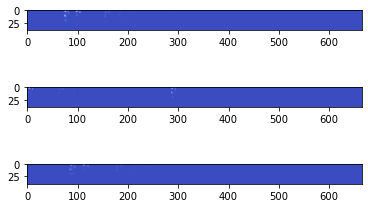

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.subplot(3, 1, 1)
plt.imshow(data[1], cmap=cm.coolwarm)
plt.subplot(3, 1, 2)
plt.imshow(data[2], cmap=cm.coolwarm)
plt.subplot(3, 1, 3)
plt.imshow(data[3], cmap=cm.coolwarm)

plt.show()

In [119]:
inf_data_reshaped = []

for i in tqdm(inf_data):
    inf_data_reshaped.append(i.reshape(-1, 40, 665, 1))

100%|██████████| 5732/5732 [00:00<00:00, 1364458.03it/s]


In [124]:
test_csv = pd.read_csv('data/test_data.csv')
test_csv

,id,age,gender,respiratory_condition,fever_or_muscle_pain
0,3806,48,female,1,0
1,3807,24,female,0,0
2,3808,29,male,0,0
3,3809,39,female,0,0
4,3810,34,male,0,0
...,...,...,...,...,...
5727,9533,43,male,0,0
5728,9534,48,female,0,1
5729,9535,44,female,0,0
5730,9536,25,female,0,0


In [120]:
# Model 추론
inf_result = []

for i in tqdmnb.tqdm(inf_data_reshaped):
    preds = model.predict(i)
    score = tf.nn.softmax(preds[0])
    class_names = [0,1]
    print('Answer is : ', class_names[np.argmax(score)])
    inf_result.append(class_names[np.argmax(score)])

  0%|          | 0/5732 [00:00<?, ?it/s]

1/1 [==============================] - 0s 237ms/step
Answer is :  0
1/1 [==============================] - 0s 10ms/step
Answer is :  0
1/1 [==============================] - 0s 23ms/step


2022-07-03 18:57:39.460687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Answer is :  0
1/1 [==============================] - 0s 12ms/step
Answer is :  0
1/1 [==============================] - 0s 9ms/step
Answer is :  0
1/1 [==============================] - 0s 12ms/step
Answer is :  0
1/1 [==============================] - 0s 9ms/step
Answer is :  1
1/1 [==============================] - 0s 9ms/step
Answer is :  0
1/1 [==============================] - 0s 9ms/step
Answer is :  0
1/1 [==============================] - 0s 8ms/step
Answer is :  0
1/1 [==============================] - 0s 9ms/step
Answer is :  0
1/1 [==============================] - 0s 11ms/step
Answer is :  0
1/1 [==============================] - 0s 8ms/step
Answer is :  0
1/1 [==============================] - 0s 9ms/step
Answer is :  1
1/1 [==============================] - 0s 9ms/step
Answer is :  0
1/1 [==============================] - 0s 12ms/step
Answer is :  0
1/1 [==============================] - 0s 13ms/step
Answer is :  0
1/1 [==============================] - 0s 10ms/step
Answ

In [132]:
print(test_csv.loc[1][3] == 0, test_csv.loc[1][4] == 0)

True True


In [133]:
tmp = inf_result
for i in range(len(tmp)):
    if test_csv.loc[i][3] == 0 and test_csv.loc[i][4] == 0:
        print('trig')
        tmp[i] = 0
    else:
        continue

trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig


In [138]:
np.max(tmp)

1

In [137]:
submission = pd.read_csv('data/sample_submission.csv')
submission = submission.drop('covid19', 1)
submission['covid19'] = tmp
submission.to_csv('3layerCnn_fullData_augmentation_00drop.csv', index=False)

/var/folders/8k/pkmq0wfd32q_r2nr5rcf2x1m0000gn/T/ipykernel_52724/604763204.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  submission = submission.drop('covid19', 1)
